In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

In [4]:
pd.read_csv(data)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [6]:
df = pd.read_csv(data, usecols=['Date', 'Temp'], index_col='Date', parse_dates=True)

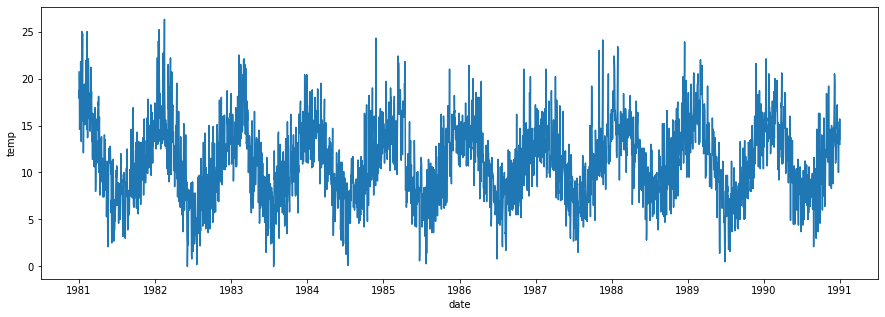

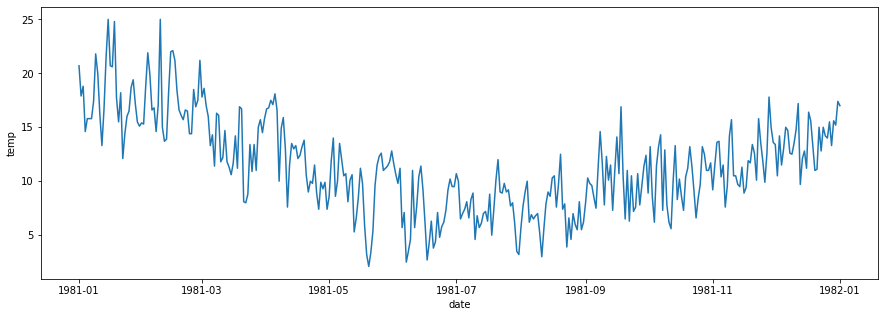

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df)
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df['01-01-1981':'01-01-1982'])
plt.xlabel('date')
plt.ylabel('temp')
plt.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


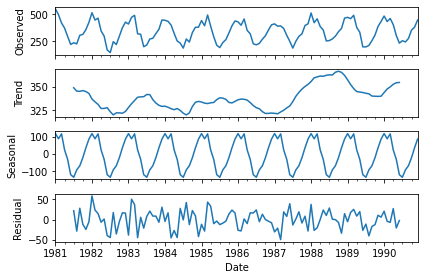

In [38]:
resampled = df.resample('m').sum()['Temp']    # change the resample y/m/d/

fig = seasonal_decompose(resampled).plot()

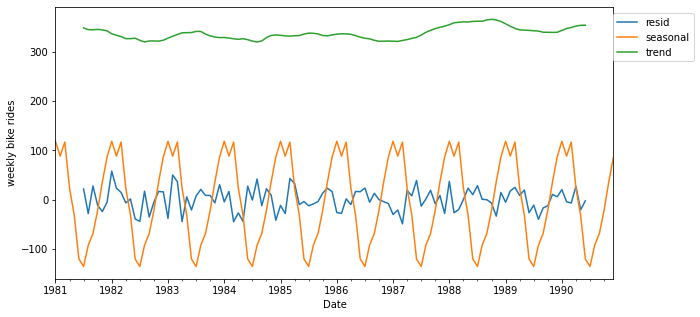

In [39]:
decopose = seasonal_decompose(resampled)
plt.figure(figsize=(10,5))
decopose.resid.plot(label="resid")
decopose.seasonal.plot(label="seasonal")
decopose.trend.plot(label="trend")
plt.legend(loc=(1,0.8))
plt.ylabel("weekly bike rides")
plt.show()

In [49]:
(df.index[1:] - df.index[:-1]) # getting the time spaces

TimedeltaIndex(['1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days',
                ...
                '1 days', '1 days', '1 days', '1 days', '1 days', '1 days',
                '1 days', '1 days', '1 days', '1 days'],
               dtype='timedelta64[ns]', name='Date', length=3649, freq=None)

Split for prediction

In [75]:
train = df[:int(df.shape[0]*0.95)]['Temp']
test = df[int(df.shape[0]*0.95):]['Temp']

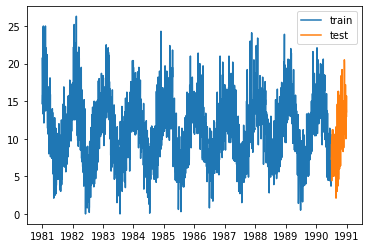

In [76]:
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.legend()
plt.show()

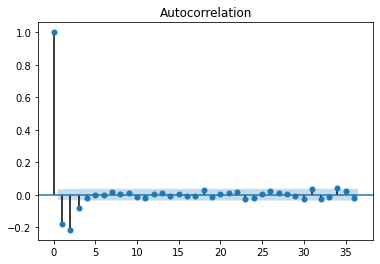

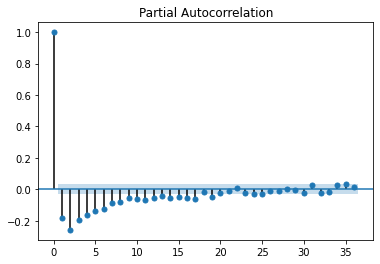

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train.diff().dropna())
plot_pacf(train.diff().dropna());

In [146]:
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.arima.model import ARIMA

from tqdm import tqdm
history = train.to_list()
predictions = []

for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(3,1,16))
    model_fit = model.fit()
    predict = model_fit.forecast()[0]
    history.append(test[t])
    predictions.append(predict)




  0%|          | 0/183 [00:00<?, ?it/s]

  1%|          | 1/183 [03:10<9:37:46, 190.48s/it]

KeyboardInterrupt: ignored

In [79]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 3648
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8411.488
Method:                       css-mle   S.D. of innovations              2.427
Date:                Thu, 14 Jan 2021   AIC                          16830.976
Time:                        15:57:18   BIC                          16855.784
Sample:                             1   HQIC                         16839.811
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.006     -0.189      0.850      -0.013       0.011
ar.L1.D.y      0.4631      0.017     27.100      0.000       0.430       0.497
ma.L1.D.y     -0.9204      0.006   -143.827      0.000      -0.933      -0.908
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1594           +0.0000j            2.1594            0.0000
MA.1            1.0864           +0.0000j            1.0864            0.0000
-----------------------------------------------------------------------------
"""

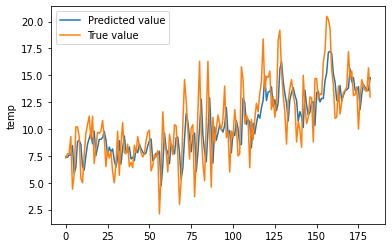

RMSE: 807.3535767794968


In [117]:
plt.plot(predictions, label='Predicted value')
plt.plot(test.to_list(), label='True value')
plt.ylabel('temp')
plt.legend()
plt.show()

RMSE = np.sqrt(((np.array(predictions) - test.values)**2).sum())
print(f'RMSE: {RMSE}')

predict next 10 days

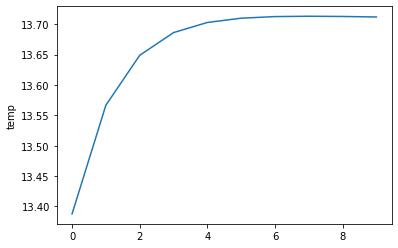

In [121]:
model = ARIMA(df['Temp'].tolist(), order=(1,1,1))
model_fit = model.fit()
plt.plot(model_fit.forecast(10)[0])
plt.ylabel('temp')
plt.show()

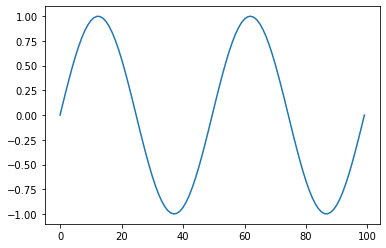

In [130]:
X = np.linspace(-2*np.pi, 2*np.pi,100)
y = np.sin(X)
plt.plot(y);

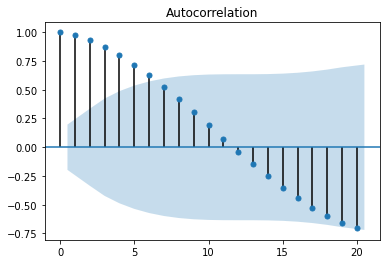

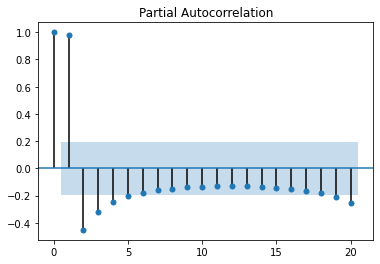

In [135]:
diff = y[:-1] - y[1:]

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(diff)
plot_pacf(diff);

In [145]:
model = ARIMA(y.tolist(), order=(1,1,1))
model_fit = model.fit()
plt.plot(model_fit.forecast(10)[0])

ValueError: ignored